# Ejercicio 2



In [1]:
# lectura de datos
datos = read.csv("hongos.txt", sep = "\t")
head(datos)
attach(datos)

time,humidity,grow.media,growth
25,45,M1,8.1
25,45,M1,8.9
25,60,M1,2.2
25,60,M1,1.1
25,85,M1,18.6
25,85,M1,12.3


In [3]:
timef = as.factor(time) # conversion a factor
humidityf = as.factor(humidity)
growmediaf = as.factor(grow.media)

**a) Escriba un modelo para el análisis de estos datos. Indique el significado de cada parámetro que
usa en el contexto del problema, valores de los subı́ndices y todas las suposiciones realizadas.** 

El modelo es:

$$y_{ijkl} = \mu + \alpha_i + \beta_j + \gamma_k + (\alpha \beta \gamma)_{ijk} + (\alpha \beta)_{ij} + (\alpha \gamma)_{ik} + (\beta \gamma)_{jk} + \epsilon_{ijkl}$$

A continuación se describen los parámetros del modelo y el rango de los índices:

- $\mu$: es la media global
- $\alpha_i$: es el tiempo, con $i = 1 \cdots 3$
- $\beta_j$: es la humedad, con $j = 1 \cdots 3$
- $\gamma_k$: es el medio de crecimiento, con $k = 1 \cdots 2$
- $(\alpha \beta \gamma)_{ijk}$: efecto de la interacción entre el tiempo, humedad y crecimiento
- $(\alpha \beta)_{ij}$: efecto de la interacción entre tiempo y humedad
- $(\alpha \gamma)_{ik}$: efecto de la interacción entre tiempo y medio de crecimiento
- $(\beta \gamma)_{jk}$: efecto de la interacción entre la humedad y medio de crecimiento
- $\epsilon_{ijkl}:$ es el error experimental, con $l=1 \cdots 36$

Las suposiciones del modelo son:

- $\epsilon_{ijkl} \sim N(0, \sigma^2)$, independientes identicamente distribuídos
 
Las restricciones del modelo son:

- $\alpha_1 = 0$
- $\beta_1 = 0$
- $\gamma_1 = 0$
- $(\alpha \beta)_{1j} = 0$
- $(\alpha \beta)_{i1} = 0$
- $(\alpha \gamma)_{1k} = 0$
- $(\alpha \gamma)_{i1} = 0$
- $(\beta \gamma)_{1k} = 0$
- $(\beta \gamma)_{j1} = 0$
- $(\alpha \beta \gamma)_{1jk} = 0$
- $(\alpha \beta \gamma)_{i1k} = 0$
- $(\alpha \beta \gamma)_{ij1} = 0$


**b) Explique por qué decidió incluir (o no) un término correspondiente a la interacción triple entre los tres factores en el modelo propuesto.**

Se incluyó un término de interacción triple en el modelo ya que tenemos 3 factores fijos y bajo el supuesto de independencia, se puede esperar que exista una posible interacción entre ellos. 

**c)¿Qué gráficos utilizarı́a para dar una respuesta exploratoria al problema planteado? Explique qué precauciones tendrı́a al realizarlo y por qué.**

Debido a que tenemos tres factores fijos que interacúan entre sí, no tendría sentido ver el boxplot, pero sí sería útil analizar gráficos de interacción para cada medio de cultivo (M1 y M2), y observando la interacción entre la humedad y el tiempo.

Para tener una idea del comportamiento, lo más razonable sería dejar el tiempo en el eje de abscisas y ver para las distintas humedades la correspondiente respuesta (crecimiento del hongo). 

Debemos tener la precaución de mostrar las interacciones entre dos de los factores fijando un nivel del tercero, ya que sino veremos una promediación para el nivel fijado. 


A continuación observamos el tipo de gráfico de interacción mencionado:

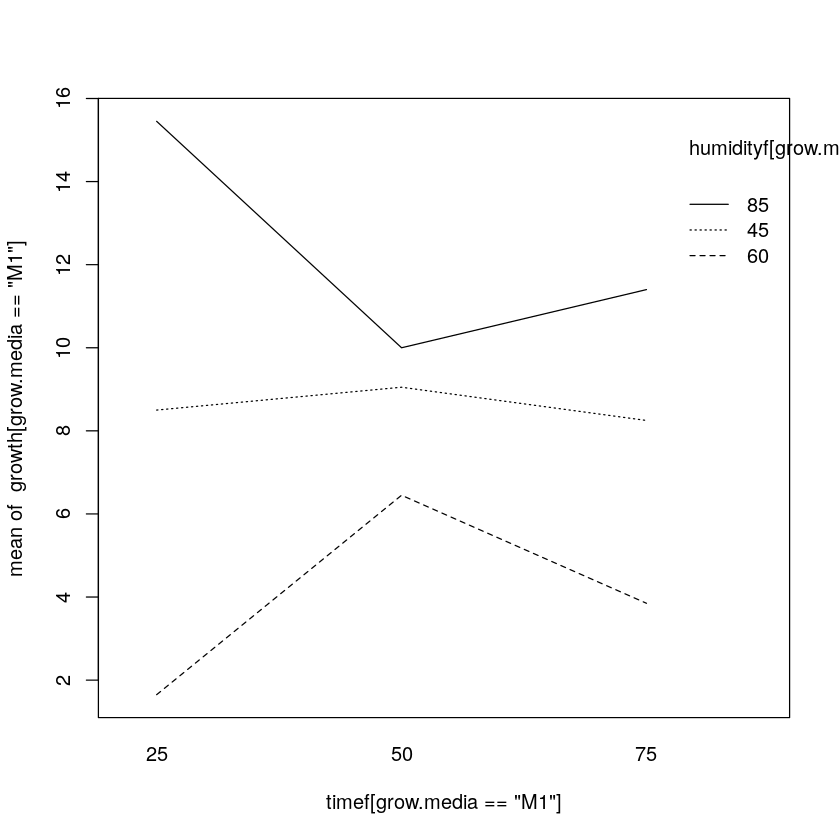

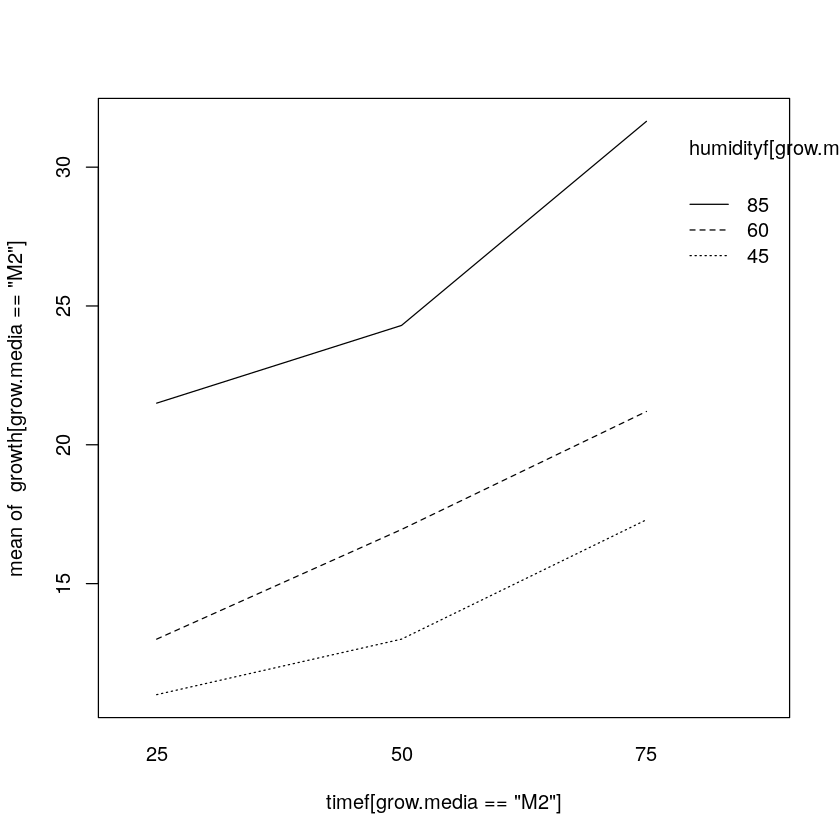

In [4]:
interaction.plot(timef[grow.media=="M1"], humidityf[grow.media=="M1"], growth[grow.media=="M1"])
interaction.plot(timef[grow.media=="M2"], humidityf[grow.media=="M2"], growth[grow.media=="M2"])

**d) El ajuste del modelo a los datos arrojó la siguiente tabla anova... En función de estos resultados, escriba un nuevo modelo que le parezca adecuado para los datos.** 

In [5]:
modelo = aov(growth~timef*humidityf*growmediaf)
summary(modelo)

                           Df Sum Sq Mean Sq F value   Pr(>F)    
timef                       2   86.3    43.1   5.609  0.01278 *  
humidityf                   2  540.6   270.3  35.144 6.09e-07 ***
growmediaf                  1 1009.1  1009.1 131.206 1.06e-09 ***
timef:humidityf             4   34.9     8.7   1.135  0.37155    
timef:growmediaf            2  123.8    61.9   8.049  0.00318 ** 
humidityf:growmediaf        2  132.6    66.3   8.622  0.00236 ** 
timef:humidityf:growmediaf  4   29.4     7.4   0.957  0.45459    
Residuals                  18  138.4     7.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

De la tabla ANOVA previa podemos descartar aquellos factores o interacción de factores cuyo *p-valor* sea mayor a la significancia $\alpha = 0.05$, de este modo se excluye del modelo los siguientes términos: 

- timef:humidityf, ($\alpha \beta$)
- timef:humidityf:growmediaf, ($\alpha \beta \gamma$)

Finalmente el modelo nos queda:

$$y_{ijkl} = \mu + \alpha_i + \beta_j + \gamma_k + (\alpha \gamma)_{ik} + (\beta \gamma)_{jk} + \epsilon_{ijkl}$$

**e) A partir del último modelo, ¿qué gráficos exploratorios podrı́a realizar ahora para estudiar la dependencia entre la respuesta y los factores considerados? ¿En qué se diferencia esta respuesta
de la dada en el item c)?**

Luego de descartar el término de interacción doble ``timef:humidityf`` y el triple ``timef:humidityf:growmediaf`` realizaría dos gráficos de interacción para los términos cuya interacción es significativa, es decir:

- ``timef:growmediaf``: dejando fijo la humedad ($\beta$)
- ``humidityf:growmediaf``: dejando fijo el tiempo ($\alpha$)

En el *item c)*, sin tener conocimiento sobre las interacciones, se fijó el ``medio de crecimiento`` y se observaron las interacciones entre el tiempo y la humedad, sin embargo ahora vemos que este factor interactúa con cada uno de los otros dos factores en forma separada, por lo que es relevante analizar su comportamiento.

**f) Prosiguiendo con su análisis, el investigador obtuvo la siguiente tabla:**

*OBSERVACIÓN: La tabla del enunciado contiene un error ya que supuso que la humedad se encontraba equispaciada cuando en realidad no es así, a continuación se usa la misma tabla para que sea equivalente al enunciado.*

In [6]:
# código para generar la tabla del enunciado
contrasts(humidityf) = contr.poly(3) 
modelo2 = lm(growth~timef*humidityf*growmediaf - (timef:humidityf:growmediaf + timef:humidityf))
summary(modelo2)


Call:
lm(formula = growth ~ timef * humidityf * growmediaf - (timef:humidityf:growmediaf + 
    timef:humidityf))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0111 -1.3486 -0.0333  1.1403  6.0722 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               8.53333    1.14018   7.484 6.03e-08 ***
timef50                  -0.03333    1.61246  -0.021 0.983665    
timef75                  -0.70000    1.61246  -0.434 0.667782    
humidityf.L               2.60451    1.14018   2.284 0.030762 *  
humidityf.Q               5.27321    1.14018   4.625 9.05e-05 ***
growmediafM2              6.63333    1.61246   4.114 0.000347 ***
timef50:growmediafM2      2.95000    2.28036   1.294 0.207159    
timef75:growmediafM2      8.91667    2.28036   3.910 0.000591 ***
humidityf.L:growmediafM2  5.91613    1.61246   3.669 0.001101 ** 
humidityf.Q:growmediafM2 -3.03465    1.61246  -1.882 0.071075 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

**¿A qué análisis corresponde este resumen? Qué representa cada uno de los términos?**

Cuando los niveles de un factor son cuantitativos y presentan un órden es interesante realizar un análisis de tendencias. 

La tabla previa se corresponde con un análisis de tendencia para estudiar si la variable respuesta se incrementa o decrementa cuando varía la *Humedad* usando una estimación lineal o cuadrática.

Para dar respuesta a este interrogante es necesario comparar los *p-valores* con un nuevo $\alpha_{PC}$ que determine la probabilidad de cometer al menor un error de tipo I para una familia de contrastes ortogonales. Para el cálculo se requiere un valor deseado de $\alpha_0 = 0.05$ utilizando la siguiente ecuación:

$$\alpha_{PC} = 1 - (1- \alpha_0)^{1/9} = 0.0056$$

En la tabla, los factores o interacciones de factores que terminan en ``.Q`` o ``.50`` refieren a la tendencia cuadrática, mientras que los que finalizan con ``.L`` o ``.75``, a la lineal. 

**g) En función del reporte presentado en la tabla anterior, escriba un modelo genérico (sin el valor de
los parámetros) adecuado para describir la (superficie de) respuesta del crecimiento de la especie de hongo estudiada en función de los factores considerados.**

Sea $x_1$, $x_2$ y $x_3$ tiempo, humedad y medio de crecimiento respectivamente, y $\epsilon$ el error aleatorio, según la tabla previa el modelo cuadrático genérico tiene la siguiente forma:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \beta_3x_2 + \beta_4x_2^2 + \beta_5x_3 + \beta_6 x_1 x_3 + \beta_7 x_1^2 x_3 + \beta_8 x_2 x_3 + \beta_9 x_2 ^2 x_3 + \epsilon$$

**h) Explique cómo procederı́a para determinar cuál es la combinación de factores que más favorece el
cremiento de hongos. ¿Encuentra alguna limitación o dificultad en el procedimiento que propone?**

Para determinar la mejor combinación de los factores sería conveniente realizar comparaciones múltiples usando Dunnet, en este caso previamente habría que optimizar para elegir el máximo, para eso es posible usar la función ``maxHSU`` ya que queremos saber aquellas combinaciones que favorecen el crecimiento. Se recomienda que el tamaño de muestra del tratamiento control sea grande, a fin de estimar su media con mayor precisión.

La limitación que podríamos encontrar es que al contar con pocas réplicas (2 por hongo) tenemos baja potencia

In [7]:
source("mymultcomp.R")
fABC = factor(paste(timef,humidityf,growmediaf))
maxHSU(growth, fABC, alpha=0.05, mse=7.7, dof=18)

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "50 85 M2"
[1] "75 85 M2"


[1] NA         "50 85 M2" "75 85 M2"

**i) Indique cuál es el crecimiento medio del hongo que predice el modelo si se cultiva en el medio M2 durante 50 horas y con una humedad del 60%.**

A partir de la tabla de medias vemos que para el medio M2, durante 50 horas a una humedad del 60%, tenemos una media de 16.95.

The 'lsmeans' package is being deprecated.
Users are encouraged to switch to 'emmeans'.
See help('transition') for more information, including how
to convert 'lsmeans' objects and scripts to work with 'emmeans'.


 timef humidityf growmediaf lsmean       SE df   lower.CL  upper.CL
 25    45        M1           8.50 1.961009 18  4.3800734 12.619927
 50    45        M1           9.05 1.961009 18  4.9300734 13.169927
 75    45        M1           8.25 1.961009 18  4.1300734 12.369927
 25    60        M1           1.65 1.961009 18 -2.4699266  5.769927
 50    60        M1           6.45 1.961009 18  2.3300734 10.569927
 75    60        M1           3.85 1.961009 18 -0.2699266  7.969927
 25    85        M1          15.45 1.961009 18 11.3300734 19.569927
 50    85        M1          10.00 1.961009 18  5.8800734 14.119927
 75    85        M1          11.40 1.961009 18  7.2800734 15.519927
 25    45        M2          11.00 1.961009 18  6.8800734 15.119927
 50    45        M2          13.00 1.961009 18  8.8800734 17.119927
 75    45        M2          17.30 1.961009 18 13.1800734 21.419927
 25    60        M2          13.00 1.961009 18  8.8800734 17.119927
 50    60        M2          16.95 1.961009 18 1

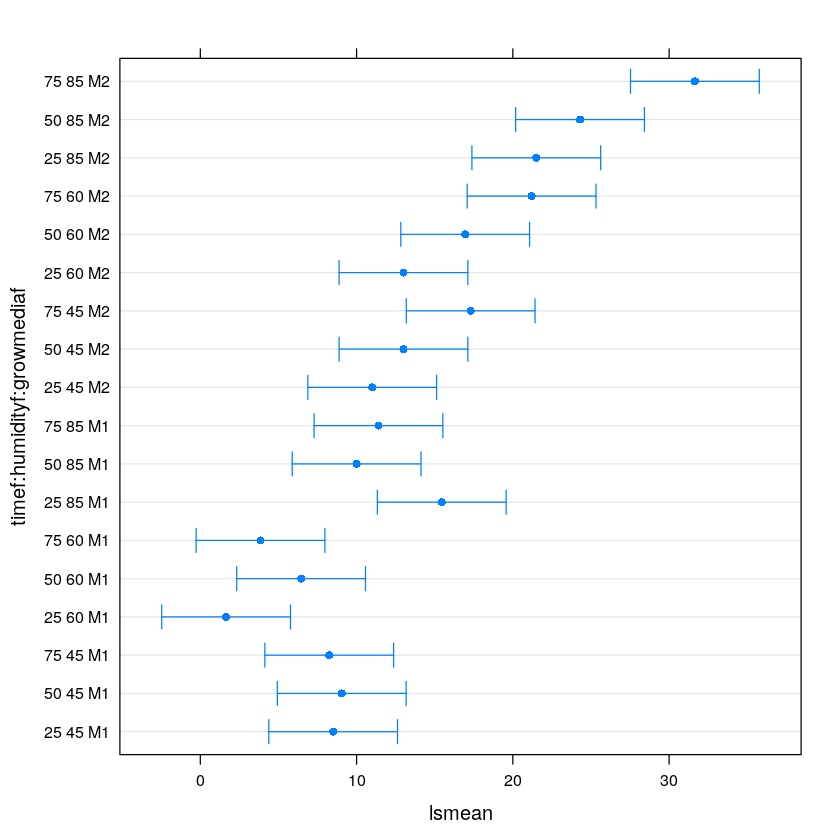

In [8]:
library(lsmeans)
lsmeans(modelo, ~timef*humidityf*growmediaf)
plot(lsmeans(modelo, ~timef*humidityf*growmediaf))

**j) Todo el análisis efectuado hasta aquı́ supuso que las mediciones son independientes. ¿Considera que es adecuada esa suposición? Justifique su respuesta y, en caso de estar en desacuerdo con la metodologı́a empleada, indique qué cambios introducirı́a en el procedimiento de análisis (no necesita hacer nada en R).**

Para corroborar la suposición de que las mediciones son independientes habría que graficar el orden en que se colectó un dato contra el residuo correspondiente, de esta manera, si al graficar en el eje horizontal el tiempo y en el eje vertical los residuos, se detecta una tendencia o patrón no aleatorio claramente definido, esto es evidencia de que existe una correlación entre los errores y, por lo tanto, el supuesto de independencia no se cumple. 

Para el caso puntual, sería razonable dudar que los factores sean independiente del tiempo, por lo que había que utilizar un modelo estadístico que incluya al resto de los factores como función del tiempo.